<a href="https://colab.research.google.com/github/sda96/AIFFEL_3rd_hackerton_TUNiB_DKTC/blob/main/notebook/ChangHyun/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 환경 설정

#### 사전에 다운 받은 패키지 불러오기

In [ ]:
!pip install transformers

In [ ]:
import os, sys
from google.colab import drive

#### matplotlib 한글 깨짐 해결 코드

해당 [사이트](https://teddylee777.github.io/colab/colab-korean)를 참고하여 위의 코드를 실행한 다음 런타임 재시작을 해주어야 합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,828 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and dire

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


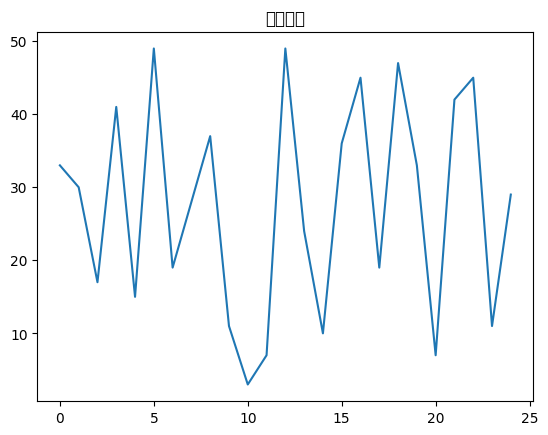

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

plt.plot(np.random.randint(1, 50, 25))
plt.title("가나다라")
plt.show()

## 데이터 불러오기

In [ ]:
import pandas as pd

under_train = pd.read_csv("/content/new_train.csv")
under_train.groupby("class").count().iloc[:,0]

,idx
class,
갈취 대화,981
기타 괴롭힘 대화,1094
일반,8142
직장 내 괴롭힘 대화,979
협박 대화,896


#### 훈련셋 검증셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter

X = under_train["conversation"].to_list()
Y = under_train["class"].to_list()

x_train, x_val_test, y_train, y_val_test = train_test_split(X, Y,
                                                            test_size = 0.1,
                                                            random_state = 200,
                                                            stratify = Y)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test,
                                                test_size = 0.5,
                                                random_state = 202,
                                                stratify = y_val_test)
print(f"x_train 개수 : {len(x_train)}")
print(f"y_train 개수 : {len(y_train)}")
print(f"x_val 개수 : {len(x_val)}")
print(f"y_val 개수 : {len(y_val)}")
print(f"x_test 개수 : {len(x_test)}")
print(f"y_test 개수 : {len(y_test)}")

print(f"훈련 데이터 레이블 비율 확인 : {Counter(y_train)}")
print(f"검증 데이터 레이블 비율 확인 : {Counter(y_val)}")
print(f"테스트 데이터 레이블 비율 확인 : {Counter(y_test)}")

x_train 개수 : 10882
y_train 개수 : 10882
x_val 개수 : 605
y_val 개수 : 605
x_test 개수 : 605
y_test 개수 : 605
훈련 데이터 레이블 비율 확인 : Counter({'일반': 7327, '기타 괴롭힘 대화': 985, '갈취 대화': 883, '직장 내 괴롭힘 대화': 881, '협박 대화': 806})
검증 데이터 레이블 비율 확인 : Counter({'일반': 407, '기타 괴롭힘 대화': 55, '직장 내 괴롭힘 대화': 49, '갈취 대화': 49, '협박 대화': 45})
테스트 데이터 레이블 비율 확인 : Counter({'일반': 408, '기타 괴롭힘 대화': 54, '직장 내 괴롭힘 대화': 49, '갈취 대화': 49, '협박 대화': 45})


## HuggingFace 적용하기

#### Tokenizing

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

HUGGINGFACE_MODEL_PATH = "klue/bert-base"
# Load Tokenizer
tokenizer = BertTokenizer.from_pretrained(HUGGINGFACE_MODEL_PATH)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Tokenizing
train_encodings = tokenizer(x_train, truncation=True, padding=True)
val_encodings = tokenizer(x_val, truncation=True, padding=True)

for key in train_encodings:
  print(f"{key} : {train_encodings[key][0]}")

input_ids : [2, 743, 4252, 3797, 14699, 11532, 8649, 2529, 35, 717, 14478, 3797, 4292, 801, 4267, 2098, 2052, 743, 3914, 7041, 2318, 1891, 2180, 2275, 35, 6168, 18, 801, 4267, 2098, 2119, 5035, 1085, 2417, 2067, 2209, 35, 16733, 18, 8786, 4416, 2097, 18, 4587, 13484, 4481, 2015, 5, 1495, 2376, 5, 4252, 2299, 2118, 3737, 1236, 2180, 2275, 4638, 8735, 2113, 1513, 13091, 2118, 5, 5, 1495, 2503, 18, 8786, 18, 7263, 2810, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Tensorflow dataset으로 변환

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                                    y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings),
                                                  y_val))
train_dataset

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(457,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(457,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(457,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
HUGGINGFACE_MODEL_PATH = str(HUGGINGFACE_MODEL_PATH)

In [ ]:
print(under_train["class"].dtype)


object


In [ ]:
under_train["class"] = pd.to_numeric(under_train["class"], errors='coerce').astype('Int64')


#### Fine-tuning BERT

In [ ]:
num_labels = max(under_train["class"]) + 1
model = TFBertForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH,
                                                        num_labels=num_labels,
                                                        from_pt=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer,
              loss=model.compute_loss,
              metrics=['accuracy'])
model.summary()

TypeError: boolean value of NA is ambiguous

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001, # the threshold that triggers the termination (acc should at least improve 0.001)
    patience=2)

model.fit(
    train_dataset.shuffle(1000).batch(16), epochs=1, batch_size=16,
    validation_data=val_dataset.shuffle(1000).batch(16),
    callbacks = [callback_earlystop]
)

252/252 [==============================] - 252s 900ms/step - loss: 0.4386 - accuracy: 0.8487 - val_loss: 0.2497 - val_accuracy: 0.9062


#### 모델 저장하기

In [ ]:
model_path = "./model/fine-tuned-klue-bert-base"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('./model/fine-tuned-klue-bert-base/tokenizer_config.json',
 './model/fine-tuned-klue-bert-base/special_tokens_map.json',
 './model/fine-tuned-klue-bert-base/vocab.txt',
 './model/fine-tuned-klue-bert-base/added_tokens.json')

## HuggingFace 모델 평가하기

In [ ]:
from transformers import TextClassificationPipeline

# Load Fine-tuning model
model_path = "./model/fine-tuned-klue-bert-base"
loaded_tokenizer = BertTokenizer.from_pretrained(model_path)
loaded_model = TFBertForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer,
    model=loaded_model,
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at ./model/fine-tuned-klue-bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./model/fine-tuned-klue-bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

predicted_label_list = []
predicted_score_list = []

for text in tqdm(x_test):
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = max(preds_list, key=lambda x: x['score'])
    predicted_label_list.append(sorted_preds_list["label"]) # label
    predicted_score_list.append(sorted_preds_list["score"]) # score

100%|██████████| 224/224 [02:16<00:00,  1.64it/s]


In [ ]:
y_pred = [int(label[-1]) for label in predicted_label_list]
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        45
           1       0.95      0.82      0.88        45
           2       1.00      0.91      0.95        45
           3       0.80      0.84      0.82        44
           4       1.00      1.00      1.00        45

    accuracy                           0.92       224
   macro avg       0.92      0.91      0.92       224
weighted avg       0.92      0.92      0.92       224



## 사후 평가

In [ ]:
false_list = []
for i in range(len(y_true)):
  if y_true[i] != y_pred[i]:
    false_list.append(i)

In [ ]:
test_dataset = pd.DataFrame({"x" : x_test, "y_true" : y_test, "y_pred" : y_pred})
test_dataset.iloc[false_list, :]

,x,y_true,y_pred
18,야 이자식 명품입었네 벗어봐 나도 사려고하던건데 입어만보자 네 저 이거 벗으면 맨몸...,1,0
22,야 뭐하냐 어 아 이 찐따새끼 또 만화 쳐보고 있네 이딴게 재밌냐 하지마 돌려줘 뭐...,3,0
38,선배 제 뒷담 그만좀 하세요 내가 언제 이제 저도 지칩니다 들었어 어디서 많이 들었...,2,3
53,이자는 이자까지 줬잖아 그건 저번 기간 이자고 이번 기간 이자까지 줘야지 이 년아 ...,3,0
56,어우 김선생 좀봐 머리를 하고왔는데도 얼굴이 저 꼬라지네 못봐주겠다 진짜 저 인간은...,2,3
60,야 찐따 응 상철아 왜 매점 가서 빵 좀 사와 돈은 아나 지난번에 덜맞았나 니가 사...,1,3
63,선생님 저 이번 시험 점수 도저히 납득이 되질 않습니다 은혜야 갑자기 그게 무슨 말...,1,3
75,야 임자 나 배고프다 나 오늘 돈 없어 그럼 너희 집으로 가자 왜 엄마계셔서 안돼 ...,1,3
83,아니 피뽑는게 왜이렇게아파 환자분 원래조끔 따금해요 바늘이 들어가는데 안아플수가없잖...,3,0
92,친구야 우리 친구 맞지 내가 너 다른반 애들한테 쥐어터질때 도와줬잖아 아 응 늘 고...,1,3


#### Confusion Matrix

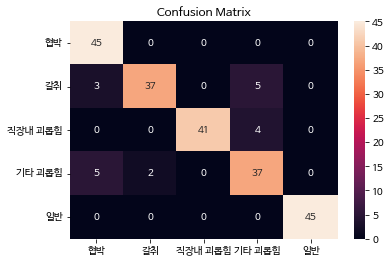

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
names = ["협박", "갈취", "직장내 괴롭힘", "기타 괴롭힘", "일반"]
conf_matrix = pd.DataFrame(conf_matrix, index = names, columns = names)
sns.heatmap(conf_matrix, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
conf_matrix.style.background_gradient(cmap = "summer")

,협박,갈취,직장내 괴롭힘,기타 괴롭힘,일반
협박,45,0,0,0,0
갈취,3,37,0,5,0
직장내 괴롭힘,0,0,41,4,0
기타 괴롭힘,5,2,0,37,0
일반,0,0,0,0,45
